### 下载数据

In [2]:
import os 
import tarfile
import requests

In [3]:
download_root_url = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
housing_path = "datasets/housing"
housing_url = download_root_url + housing_path + "/housing.tgz"


In [4]:
def get_housing_data(housing_url=housing_url, housing_path=housing_path):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tar_gz_path = os.path.join(housing_path, "housing.tgz")
    reques_res = requests.get(housing_url)
    print (reques_res)
    with open(tar_gz_path,'wb') as f:
        f.write(reques_res.content)

In [21]:
# 调用函数，下载数据
get_housing_data()

<Response [200]>


### 查看数据

In [1]:
import pandas as pd

In [5]:
def load_housing_data(housing_path=housing_path):
    """
    返回包含所有数据的pandas的DataFrame对象
    """
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [8]:
housing_data = load_housing_data()
housing_data.head()
# 一行表示一个街区,共有10个属性

,经度,维度,房屋年龄中位数,总房间数,总卧室数,人口数,家庭数,收入中位数,房屋价值中位数,离大海距离
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housin_data.info()
# 表示每个熟悉值,和数据类型,总卧室数少于20433说明有207个街区却少这个值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
经度         20640 non-null float64
维度         20640 non-null float64
房屋年龄中位数    20640 non-null float64
总房间数       20640 non-null float64
总卧室数       20433 non-null float64
人口数        20640 non-null float64
家庭数        20640 non-null float64
收入中位数      20640 non-null float64
房屋价值中位数    20640 non-null float64
离大海距离      20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
housin_data['离大海距离'].value_counts()
# 查看该属性都有哪些类别

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: 离大海距离, dtype: int64

In [11]:
housin_data.describe()
# 展示数值属性的概括
# 25%、50%、75% 表示对应的分位数。即：每个分位数指明小于这个值,且指定分组的百分比，比如有25%的街区人口数少于787

,经度,维度,房屋年龄中位数,总房间数,总卧室数,人口数,家庭数,收入中位数,房屋价值中位数
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### 用图展示数据属性

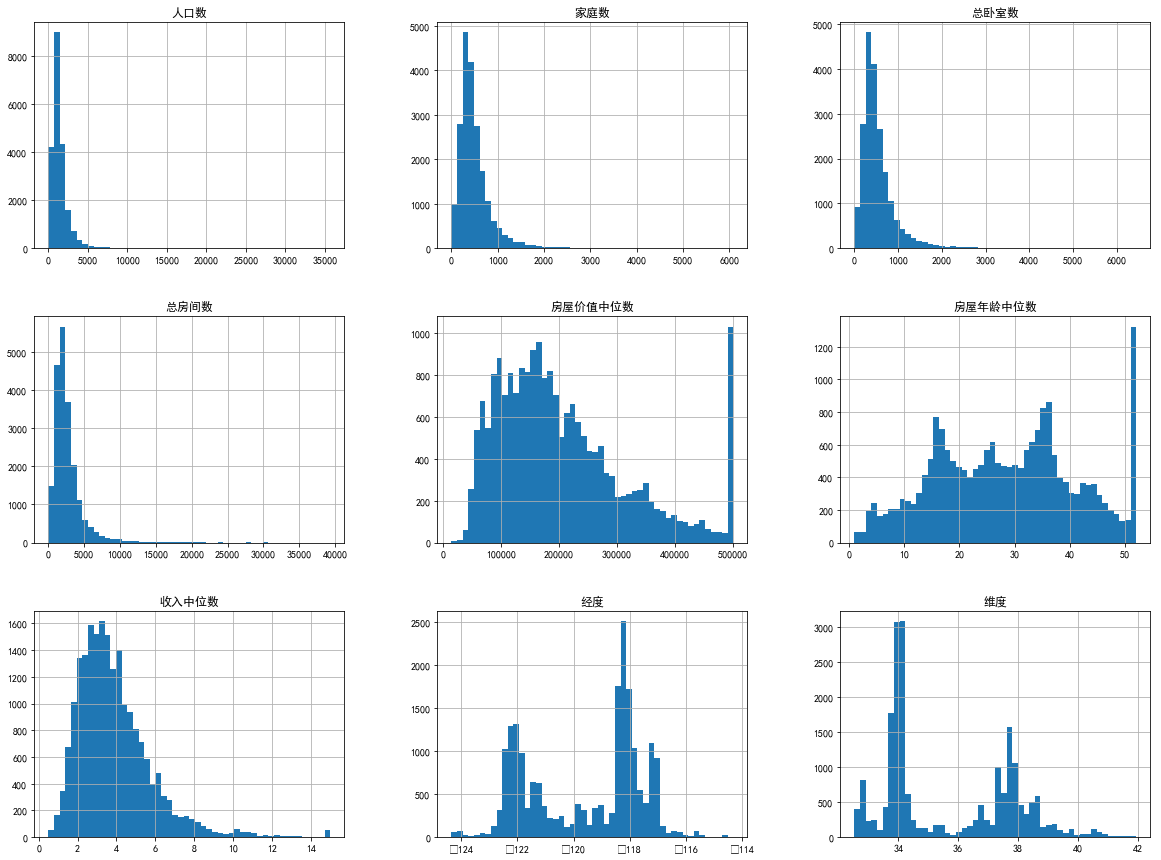

In [16]:
%matplotlib inline
#　只在Jupter notebook展示
import matplotlib.pyplot as plt
import matplotlib
# 指定字体避免画图中文显示乱码
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family']='sans-serif'

housin_data.hist(bins=50, figsize=(20, 15))
plt.show()